<h1 align="center"> Zoo Animal Classification/Avance II </h1>
<h3 align="center"> Equipo: Equipo1. Grupo: 001, Lunes-Miércoles-Viernes/6:00pm-7:00pm </h3>
<h3 align="center"> Integrantes: 1884095, Mata Monsiváis Angel Alfonso
	          1884110, Garcia Villarreal Lizeth Guadalupe
          1739252, Ontiveros Castillo Emmanuel.
</h3>

In [1]:
#Importar librerias
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas_profiling
from matplotlib.colors import ListedColormap

## 1. Lectura y limpieza de datos 

* Cargar datos de tabla Zoo y tabla Clases en su respectivo data frame para manipular. El data frame zoo contiene las caracteristicas de los animales. El data frame zooClas contiene las clases (1: Mammal, 2: Bird, 3: Reptile, 4: Fish, 5: Amphibian, 6: Bug, 7: Invertebrate) a las que pertenecen los animales.

In [2]:
zoo = pd.read_csv('/home/mata/Documentos/Escuela/Mineria/proyecto/zoo-animal-classification/zoo.csv')
zooClass = pd.read_csv('/home/mata/Documentos/Escuela/Mineria/proyecto/zoo-animal-classification/class.csv')

* Encabezado de Zoo, visualizacion previa. Se puede observar que los valores que contiene son en binario (1,0) verdadero o falso, a excepcion de dos columas las cuales son legs que contienen el numero de piernas del animal, y class_type que contiene el numero de la clase de animal que pertenece.

In [3]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


* Verificando valores de tabla Zoo y valores nulos

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


* Verificaremos la suma de los valores nulos que contenga

In [5]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

_No hay valores nulos en este data frame de zoo_

* Buscamos si hay animales duplicados en animal_name de la tabla Zoo

In [6]:
duplicates = zoo.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

_Al parecer aparecio frog repetido dos veces_

* Seleccionamos estos duplicados de frog para ver la semejanza que hay en sus caracteristicas para comprobar visualmente si son identicas y de ser el caso solo se dejara una frog

In [7]:
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


Encontramos en sus caracteristicas que una frog es venenosa y otra no.

* Separaremos 2 tipos de frog poniendo la que es venenosa como venoumos_frog en la columa animal_name

In [8]:
zoo['animal_name'][(zoo.venomous == 1 )& (zoo.animal_name == 'frog')] = 'venoumous_frog'

/home/mata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


* Comprobamos buscando estas frog para ver si se aplico el cambio

In [9]:
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


In [10]:
venoumous_frog = zoo.loc[zoo['animal_name'] == 'venoumous_frog']
venoumous_frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
26,venoumous_frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


* Encabezado de clases, visualizacion previa.

In [11]:
zooClass.head(7)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


* Verificando valores de tabla class

In [12]:
zooClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
Class_Number                         7 non-null int64
Number_Of_Animal_Species_In_Class    7 non-null int64
Class_Type                           7 non-null object
Animal_Names                         7 non-null object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


## 2. Estadistica

* Con el comando unique podemos extraer los valores unicos de la columna

In [13]:
print(zoo.class_type.unique())

[1 4 2 7 6 5 3]


Precisamente vemos que lanza los datos 1,2,3,4,5,6,7 los cuales pintan a la clase animal que pertenecen 

* Veremos la descripcion de zoo aunque no es importante ya que son solo valores binarios de cierto y falso

In [14]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## 3. Graficas

* Comprobando la cantidad total de cada clase de animal  1: Mammal
2: Bird 3: Reptile 4: Fish 5: Amphibian
6: Bug 7: Invertebrate

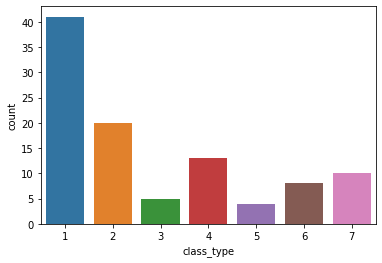

In [15]:
sns.countplot(zoo['class_type'])

* Verifecaremos la cantidad de piernas de cada animal con sus respectivas frecuencias y que es un dato pelculiar ya que no se mandeja en binario

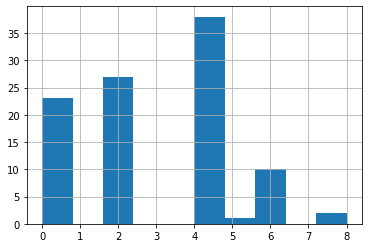

In [16]:
legs = zoo.legs
legs.hist()

* Con un mapa de calor se podra mostrar correlaciones de Zoo con todas las semejanzas de las caracteristicas de los animales

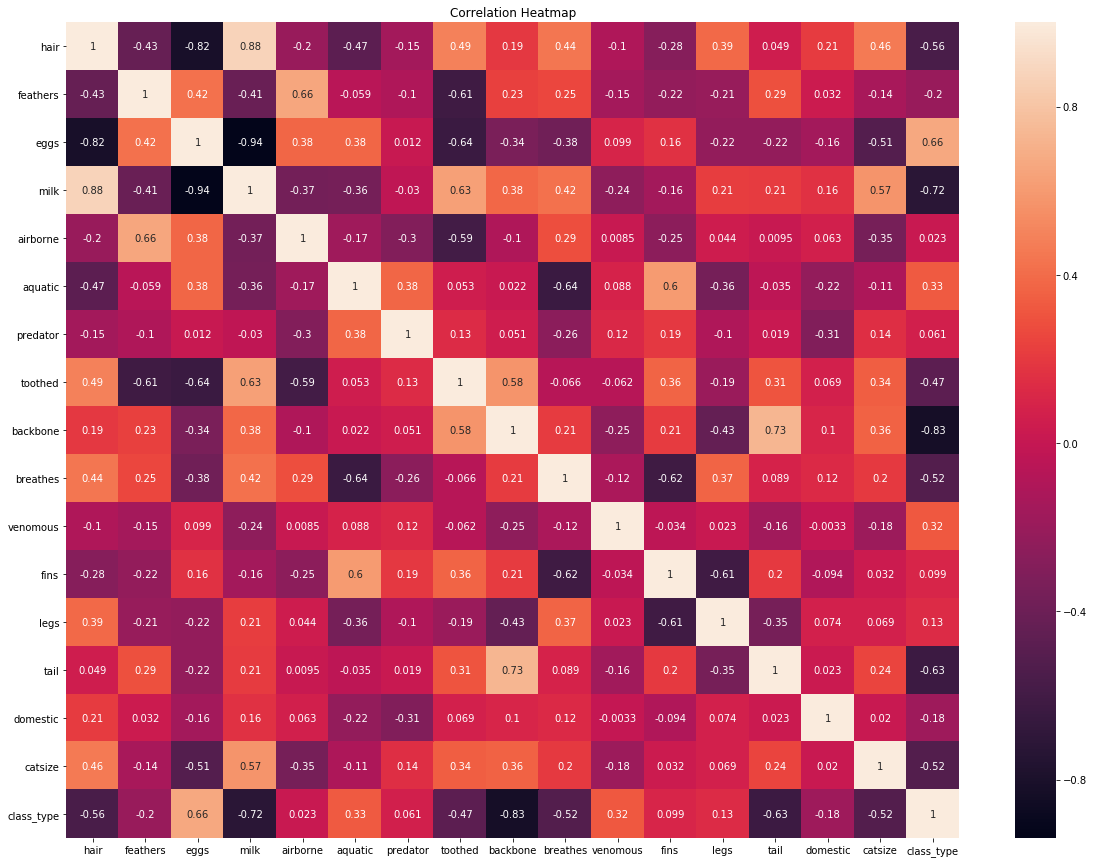

In [17]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = zoo.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

* Unimos ambos data frame de zoo y zooClass para tener una sola tabla y tener mas optima y concreta la informacion con los cambios echos anteriormente como la correccion de la rana venenosa y la rana.

In [18]:
unir = pd.merge(zoo,zooClass,how='left',left_on='class_type',right_on='Class_Number')
unir.head(100)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,0,1,1,0,1,0,1,0,1,...,0,2,1,0,1,2,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


* Guardaremos el dara frame de unir en un .cvs para su manipulacion mas adelante 

In [19]:
header = ['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','class_type','Class_Number','Number_Of_Animal_Species_In_Class','Class_Type','Animal_Names']
unir.to_csv('zooAndClass.csv',columns = header, index=False)
lol = pd.read_csv('zooAndClass.csv')
lol.head(14)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
5,buffalo,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
6,calf,1,0,0,1,0,0,0,1,1,...,0,4,1,1,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
7,carp,0,0,1,0,0,1,0,1,1,...,1,0,1,1,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
8,catfish,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
9,cavy,1,0,0,1,0,0,0,1,1,...,0,4,0,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


* Se puede apreciar mucho mejor en esta grafica lo que tenemos realmente en la base de datos

/home/mata/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/mata/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


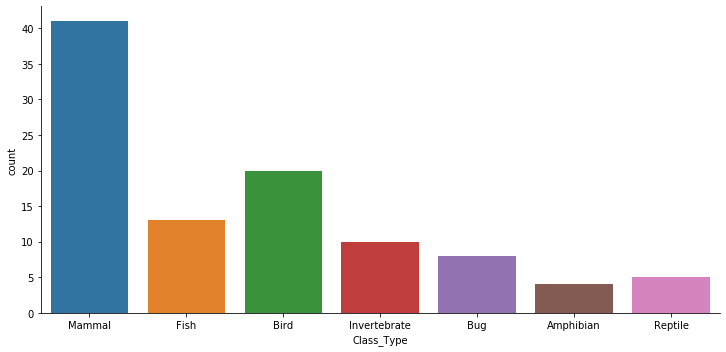

In [20]:
sns.factorplot('Class_Type', data=lol, kind="count",size = 5,aspect = 2)

* Conclusion

Quizas el problema principal planteado radica en encontrar la tecnica adecuada dentro de la basede datos ZOO, esto es para poder determinar patrones entre los datos que permitan las agrupaciones de especies según sus características morfológicas, y así afirmar y abalar las hipótesis demostradas de clasificaciones de animales en las preguntas de interes:
•Las asociaciones más frecuentes están relacionadas a los mamíferos ?.
•Las características más concluyentes son referentes a la agrupación de animales para las
especies “mamíferos”, “aves” y “ peces”?.
•Características tales como pelaje, número de patas o la capacidad de amamantar son
concluyentes al momento de la clasificación de animales dentro de la especie “mamíferos”.
También, se hace necesario aclarar algunas asociaciones implícitas que no eran completamente claras al momento de utilizar técnicas de estadística descriptiva tales como moda, media, medidas de dispersión, etc. 
Por tal motivo, se presenta el problema de clasificar especies de forma más precisa por medio de analizar las tecnicas que usaremos entre características morfológicas, y así obtener conocimiento por medio de relaciones relevantesentre variables que son presentadas en el dataset para cada animal.